In [31]:
import pylab as plt
import numpy as np
from  scipy.interpolate import interp1d

%matplotlib inline

# Make plots to compare to RIKEN data shown at SMI2023


In [32]:
from RFCTool import *

In [33]:
RFS=RFCSettings(p=0.25*1e-3,N=2,Epush=1000,q=1,m=133,T=293,Vpp=400,Omega=8e6 *2*pi,mu=0.0018,yloss=-1 )

In [34]:
Drag = 0.04  # Drag field, V/m
D    = 0.025    # Total carpet length, m

EMin = 1000
EMax = 2000

# Cs
#mu0=0.00182
#mI=133

#K
mu0=0.002126
mI=39

v=Drag*RFCt.mu # DC drag field

Pressures=[0.133,0.200,0.266]  # Pressures in bar
Colors=['red','darkorange','darkgoldenrod']

In [35]:

AllVs=[]
AllLosses=[]
DGamma=[]
Effic=[]


NSteps=20

PushFieldBins  = np.linspace(EMin,EMax,NSteps)
Distances      = np.linspace(0,D,NSteps)

Effics=[]

RFS.m     = mI

# Run once at each pressure
for P in Pressures:
    RFS.mu    = mu0/P
    print(P)
    
    # Find the V-range for transport using highest allowed field
    RFS.Epush = np.max(PushFieldBins)
    RFCt      = RFC(RFS)
    VMin      = RFCt.VMin()
    Vs        = np.linspace(VMin, 200, 100)

    # For each pressure we'll make efficiency vs voltage. Efficiency goes in this array
    Effic=[]
    for V in Vs:    
        Eff=0 #Add a contribution from each distance / EField
        for Ei in range(0,NSteps):
            RFS.Epush = PushFieldBins[Ei]
            RFCt      = RFC(RFS)
            ThisVMin  = RFCt.VMin()
            Losses    = []
            if(V<ThisVMin):
                Eff+=0  # If V<ThisVMin it means no stable trajectories from this place
            else:
                RFS.Vpp=V
                RFCt.Update(RFS)

                Eff+=np.exp(-Distances[Ei]*RFCt.IonLossRate()/v)/NSteps
        Effic.append(Eff)

    Effics.append(Effic)
    AllVs.append(Vs)




0.133
0.2
0.266


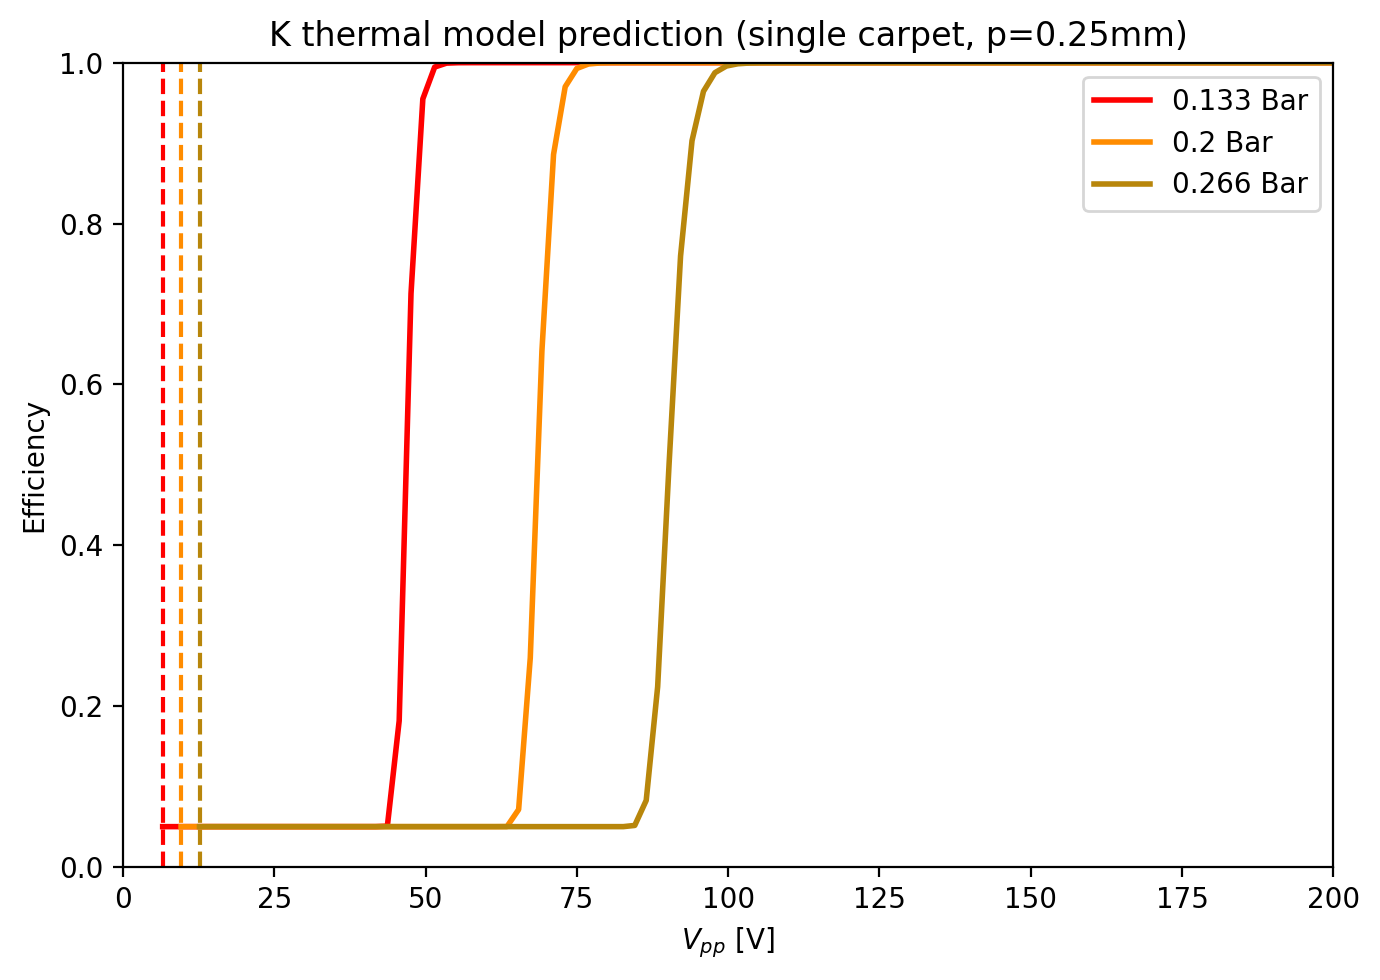

In [36]:
fig, ax1 = plt.subplots(figsize=(7,5),dpi=200)

for i in range(0,3):
    plt.plot(AllVs[i], Effics[i],label=str(Pressures[i])+' Bar',color=Colors[i],linewidth=2)
    plt.plot([AllVs[i][0],AllVs[i][0]],[0,10],'--',color=Colors[i])
    

plt.ylabel(r"Efficiency")
plt.ylim(0,1)

plt.xlabel(r"$V_{pp}$ [V]")
plt.title(r"K thermal model prediction (single carpet, p=0.25mm)")
plt.xlim(0,200)

plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("Plots/RikenPlot.png")
